# Import Dependencies &  Dataset


In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

imperson2015=pd.read_csv('PER_AUX.CSV',delimiter=',')
imperson=pd.read_csv('FARS_Per_Aux_Raw_2017.csv',delimiter=',')
person_df=pd.DataFrame(imperson)
person_df2015=pd.DataFrame(imperson2015)


# Data Cleanup & ValueSet Cleanup 

In [3]:
#Changed all of the FARS attributes into their formatted values. 
#Changed headers from SAS variable name to the variable description. 
#Removed 8 column headers for 2017 Data.
person_df.rename(columns = {'A_RESTUSE':'RESTRAINT USE','A_HELMUSE': 'HELMET USE','A_RCAT': 'RACE','A_HRACE':'RACE AND HISPANIC','A_AGE7':'AGE GROUPS','A_PTYPE':'PERSON TYPE','A_LOC':'NON-MOTORIST LOCATION','A_HISP':'HISPANIC ORIGIN','A_ALCTES': 'ALCOHOL TESTING','PER_NO':'NUMBER OF PEOPLE','VEH_NO':'NUMBER OF VECHIClES','A_REST':'SEAT BELT','A_PERINJ':'PERSON INJURY TYPE', 'A_EJECT':'EJECTION'}, inplace = True)
person_df[''] = person_df['EJECTION'].replace(
   {1: 'Not Ejected', 2: 'Ejected', 3: 'Unknown'}, inplace=True)
person_df[''] = person_df['NON-MOTORIST LOCATION'].replace(
   {1: 'Non-Applicable Occupants', 2: 'Within An Intersection', 3: 'Non-Intersection', 4:'Unknown'}, inplace=True)
Person_df = person_df[''] = person_df['PERSON INJURY TYPE'].replace(
   {1: 'Fatal', 2: 'Incapacitating Injured Estimate', 3: 'Nonincapacitating Injured Estimate', 4:'Other Injured', 5:'Not Injured Estimate', 6:'Survivor in Fatal Crash', 7: 'Other/Unknown'}, inplace=True)
person_df.drop(person_df.columns[[0, 1, 2, 3, 4, 5, 7, 8]], axis=1, inplace=True)
person_df[''] = person_df['PERSON TYPE'].replace(
   {1: 'Driver', 2: 'Occupant', 3: 'Pedestrian', 4:'Pedalcyclist', 5:'Unknown NonOccupants'}, inplace=True)
Person_df = person_df[''] = person_df['AGE GROUPS'].replace(
   {1: '<5', 2: '5-9', 3: '10-15', 4:'16-20', 5:'21-24', 6:'25-34', 7: '35-44', 8:'45-54', 9:'55-64', 10:'65-74', 11:'>74 '}, inplace=True)
person_df[''] = person_df['ALCOHOL TESTING'].replace(
   {1: 'No Alcohol', 2: 'Positive BAC', 3: 'Not Tested', 4:'Tested, with Unknown Results', 5:'Unknown if Tested'}, inplace=True)
person_df[''] = person_df['HISPANIC ORIGIN'].replace(
   {0: 'Not Applicable or Not Available', 1: 'Non-Hispanic', 2: 'Hispanic', 3:'Unknown'}, inplace=True)
person_df[''] = person_df['HELMET USE'].replace(
   {1: 'Helmeted', 2: 'Not Helmeted', 3:'Unknown'}, inplace=True)
person_df[''] = person_df['RESTRAINT USE'].replace(
   {1: 'Restrained', 2: 'Not Restrained', 3:'Unknown'}, inplace=True)
Person_df = person_df[''] = person_df['RACE'].replace(
   {0:'Not Applicable or Not Available',1: 'White', 2: 'Black', 3: 'American Indian', 4:'Asian', 5:'Pacific Islander', 6:'Mixed Race', 7: 'All Other Races', 8:'Unknown'}, inplace=True)
Person_df = person_df[''] = person_df['RACE AND HISPANIC'].replace(
   {0:'Not Applicable or Not Available',1: 'Hispanic', 2: 'White Non-Hispanic', 3: 'Black, Non-Hispanic', 4:'American Indian, Non-Hispanic/Unknown', 5:'Asian, Non-Hispanic/Unknown', 6:'Pacific Islander, Non-Hispanic/Unknown', 7: 'Multiple Races, Non-Hispanic/Unknown', 8:'All Other Non-Hispanic or Race', 9:'Unknown Race and Unknown Hispanic'}, inplace=True)
person_df.head(1)

,AGE GROUPS,ST_CASE,NUMBER OF VECHIClES,NUMBER OF PEOPLE,YEAR,PERSON TYPE,RESTRAINT USE,HELMET USE,ALCOHOL TESTING,HISPANIC ORIGIN,RACE,RACE AND HISPANIC,EJECTION,PERSON INJURY TYPE,NON-MOTORIST LOCATION,
0,35-44,10001,1,1,2017,Driver,Not Restrained,Not Helmeted,Not Tested,Non-Hispanic,White,White Non-Hispanic,Ejected,Fatal,Non-Applicable Occupants,None


In [4]:
#Rename headers and dropped unneeded columns
person_df2015.rename(columns = {'A_RESTUSE':'RESTRAINT USE','A_HELMUSE': 'HELMET USE','A_RCAT': 'RACE','A_HRACE':'RACE AND HISPANIC','A_AGE7':'AGE GROUPS','A_PTYPE':'PERSON TYPE','A_LOC':'NON-MOTORIST LOCATION','A_HISP':'HISPANIC ORIGIN','A_ALCTES': 'ALCOHOL TESTING','PER_NO':'NUMBER OF PEOPLE','VEH_NO':'NUMBER OF VECHIClES','A_REST':'SEAT BELT','A_PERINJ':'PERSON INJURY TYPE', 'A_EJECT':'EJECTION'}, inplace=True)
person_df2015.drop(person_df2015.columns[[0,1,2,3,4,5,7,8]], axis=1, inplace=True)
#Added Grouping for viewing data
Person_df = person_df[''] = person_df['NUMBER OF PEOPLE'].replace(
   {4:'4+', 5:'4+', 6:'4+', 7: '4+', 8:'4+', 9:'4+',10:'4+',11:'4+',12:'4+',13:'4+'}, inplace=True)
#Display Data set for Hears
person_df2015.head(1)


,AGE GROUPS,ST_CASE,NUMBER OF VECHIClES,NUMBER OF PEOPLE,YEAR,PERSON TYPE,SEAT BELT,ALCOHOL TESTING,HISPANIC ORIGIN,RACE,RACE AND HISPANIC,EJECTION,PERSON INJURY TYPE,NON-MOTORIST LOCATION
0,65-74,10001,1,1,2015,Driver,Restraint Not Used,Positive BAC,Non-Hispanic,White,White Non-Hispanic,Not Ejected,Fatal (FARS),Not Applicable (Occupants)


# Plots of Analysis

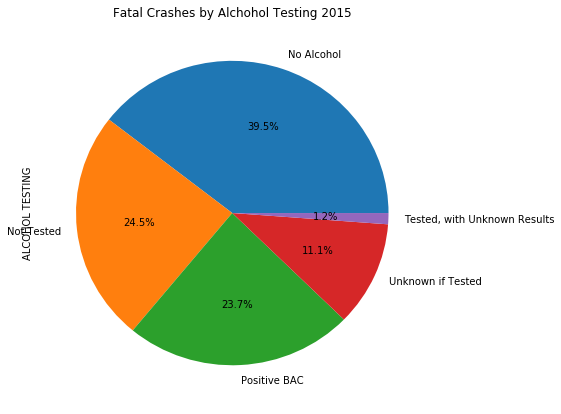

In [5]:
Fatalcrashes=person_df2015.loc[person_df2015['PERSON INJURY TYPE']=='Fatal (FARS)']
Fatalcrashes["ALCOHOL TESTING"].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))
plt.title('Fatal Crashes by Alchohol Testing 2015')
plt.savefig('Fatal_Crashes_by_Alchohol_Testing_2015.png')
plt.show();


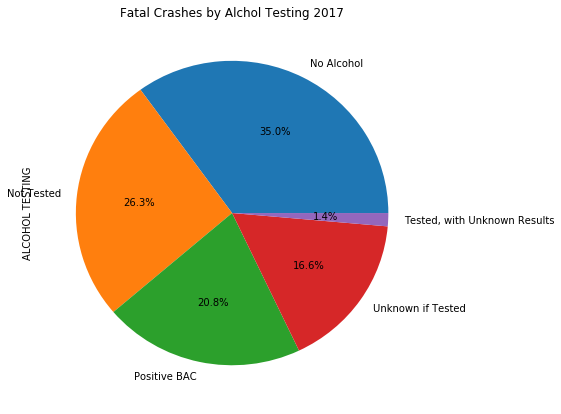

In [6]:
Fatalcrashes2=person_df.loc[person_df['PERSON INJURY TYPE']=='Fatal']
Fatalcrashes2["ALCOHOL TESTING"].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))
plt.title('Fatal Crashes by Alchol Testing 2017')
plt.savefig('Fatal_Crashes_by_Alcohol_2017.png')
plt.show();

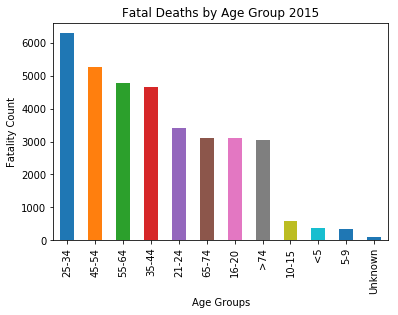

In [13]:
Fatalcrashes["AGE GROUPS"].value_counts().plot(kind='bar',)
plt.ylabel('Fatality Count')
plt.xlabel('Age Groups')
plt.title('Fatal Deaths by Age Group 2015')
plt.savefig('Fatal_Deaths_by_Age_Group_2015.png')
plt.show;

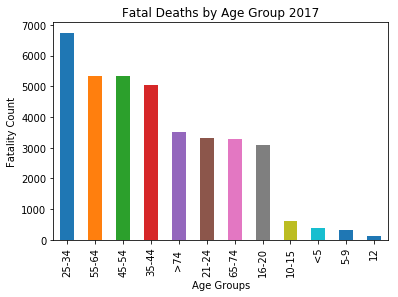

In [10]:
Fatalcrashes2["AGE GROUPS"].value_counts().plot(kind='bar',)
plt.title('Fatal Deaths by Age Group 2017')
plt.ylabel('Fatality Count')
plt.xlabel('Age Groups')
plt.savefig('Fatal_Deaths_by_Age_Group_2017.png')
plt.show;

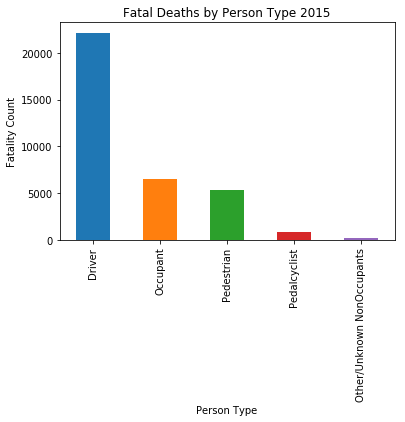

In [11]:
Fatalcrashes["PERSON TYPE"].value_counts().plot(kind='bar',)
plt.title('Fatal Deaths by Person Type 2015')
plt.ylabel('Fatality Count')
plt.xlabel('Person Type')
plt.savefig('Fatal_Deaths_by_Person_Type_2015.png')
plt.show;

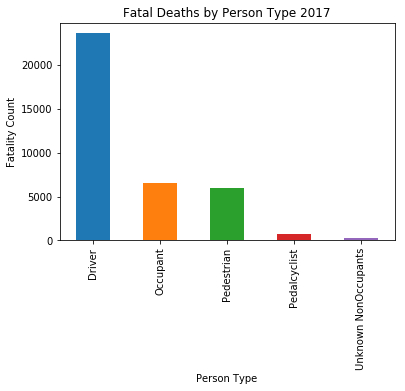

In [12]:
Fatalcrashes2["PERSON TYPE"].value_counts().plot(kind='bar',)
plt.title('Fatal Deaths by Person Type 2017')
plt.ylabel('Fatality Count')
plt.xlabel('Person Type')
plt.savefig('Fatal_Deaths_by_Person_Type_2017.png')
plt.show;